# Quantum Applications and Algorithms - Getting Started


## Quantum Approaches Inventory - 
(from Olivier Ezratty's book, Understanding Quantum Technologies 2023)

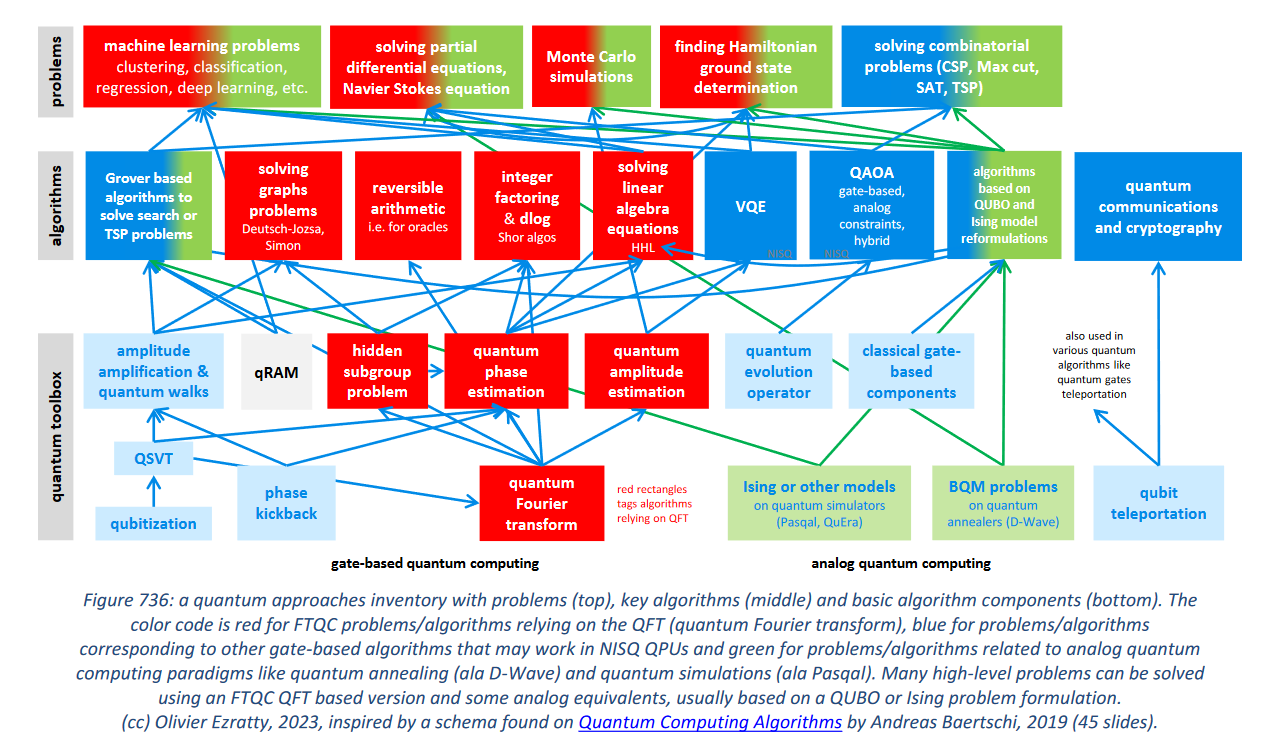



<H2>Quantum Fourier Transform - a QC subroutine, a primitive in quantum algorithms</H2>

"The quantum Fourier transform is a technique that implements a discrete Fourier transform in an efficient way. The discrete Fourier transform takes as input a vector of N complex numbers and outputs N transformed complex numbers.  The quantum Fourier transform is very similar, only it is a linear operator which applies a transformation on the basis states." 

"Figure 4.10 shows a relatively simple circuit which given an n-qubit input register, prepares
the superposition," <a href="https://pages.cs.wisc.edu/~jvangael/pubs/msthesis.pdf">JVG</a> thesis. 


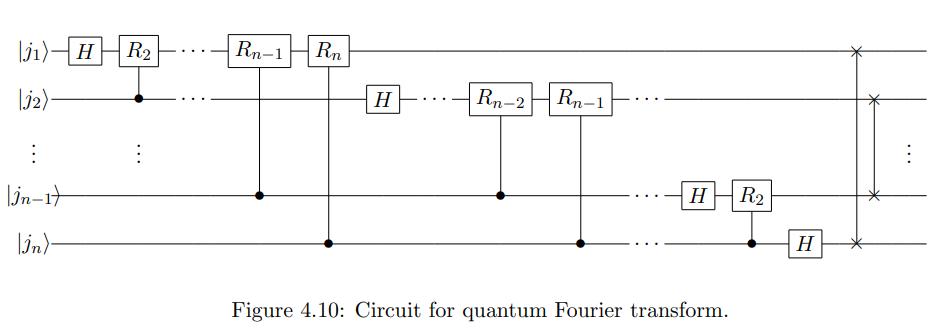

<H2>Q: What can we use it for? </H2> <br>
       See red rectangles in diagram above. <br>  
       In an example below, we will use it for basic arithmetic, which could be used in Grover's algorithm.

<H2>Q: How much speedup does it provide? </H2> <br>
       Exponential speedup.  

"The Fourier coefficients are hidden in the probability amplitude of the state and there is no straightforward way to discover them. Nonetheless, for a certain class of problems it is possible to unleash the power of the quantum Fourier transform and force an <b>exponential decrease in circuit size</b>. We next briefly introduce one representative of this class
of algorithms, Shor’s factoring algorithm," <a href="https://pages.cs.wisc.edu/~jvangael/pubs/msthesis.pdf">JVG </a> thesis.  


<H2>Q: What is the source of the quantum mechanical speedup (ISE) in the QFT?</H2> <br><br>

<table>
  <tr>
    <th>QM Feature</th>
    <th>Used?</th>
    <th>Source of the QM speedup?</th>
  </tr>
  <tr>
    <td>Interference (I)</td>
      <td>Yes</td>
      <td>Maybe</td>
  </tr>
  <tr>
    <td>Superposition (S)</td>
    <td>Yes</td>
    <td>No</td>
  </tr>
  <tr>
    <td>Entanglement (E)</td>
    <td>Yes</td>
    <td>Maybe</td>  
  </tr>
</table>

<br><br>

"When asking which phenomena are responsible for the speedup quantum algorithms have over
classical algorithms, one gets as many answers as there are quantum information scientists:
entanglement, superposition, interference, quantum parallelism," <a href="https://pages.cs.wisc.edu/~jvangael/pubs/msthesis.pdf">JVG </a> thesis.

<br><br>

<a href=https://en.wikipedia.org/wiki/Quantum_Computation_and_Quantum_Information><b> The power of quantum computation </b></a>

"How powerful are quantum computers? <b> What gives them their power?  Nobody yet knows the answers to these questions </b>, despite the suspicions fostered by examples such as factoring, which strongly suggests that quantum computers are more powerful than classical computers.  It is still possible that quantum computers are no more powerful than classical computers, in the sense that any problem which can be efficiently solved on a quantum computers can also be efficiently solved on a classical computer.  On the other hand, it may eventually be proved that quantum computers are much more powerful than classical computers.  We now take a brief look at what is known about the power of quantum computation," <b>Nielsen and Chuang, 2010, p. 40, Chapter on Quantum Algorithms </b>. Proceeds with commentary on Computational Complexity Theory.    

<a href=https://cs.uchicago.edu/news/uchicago-scientists-make-new-discovery-proving-entanglement-is-responsible-for-computational-hardness-in-quantum-systems/>UChicago Fefferman Paper</a> <br>
"There is still plenty that scientists don’t understand about the basic foundations of quantum computing that make it hard to move forward in the field. From a first principle standpoint, certain questions need to be answered: Why is quantum computing so powerful? Why does Shor’s algorithm work? What quantum properties is it using that causes these speedups? After years of research attempting to better understand these issues, this work gives an example of a quantum system for which entanglement can be identified as the clearcut answer." <br>

"“Entanglement is a fundamental property of quantum systems, and it’s a property that we think is very different from anything that happens in the classical world,” Fefferman explained. “Furthermore, there’s always been an intuition that entanglement is one of the root causes of these quantum speedups. It’s an important contributor to the power of quantum computers, but it wasn’t totally clear that entanglement was the sole cause. That’s what our paper is trying to address.” <br>

"The problem the team presented in the paper is not useful in the same sense that Shor’s algorithm is, but it can be mathematically described and is meaningful to quantum theory. The key point is that entanglement can be seen to be the root cause of the computational speedup."


<H3>Superposition - how to create it in Qiskit</H3>

In [1]:
import numpy as np
from qiskit import Aer, BasicAer, ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.execute_function import execute
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

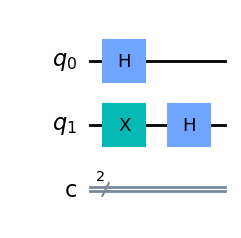

In [2]:
num_qubits = 2
num_cl_bits = 2
qc = QuantumCircuit(num_qubits, num_cl_bits)

qc.h(0)
qc.x(1)
qc.h(1)

qc.draw("mpl")

<H3>Both qubits above are in superposition, but are not entangled</H3> <br>
The first qubit is in the <b> |+> = 1/sqrt(2)*(|0> + |1>)</b> state, and the second is in the <b> |-> = 1/sqrt(2)*(|0> - |1>) </b> state. <br> <br> <br>

In [3]:
backend = BasicAer.get_backend('statevector_simulator')

job = execute(qc, backend)

result = job.result()

state_vector = result.get_statevector()

# Print the statevector for a 2-qubit state, (|00>, |01>, |10>, |11>)

# We see: (1/2, 1/2, -1/2, -1/2)

# In Qiskit, the qubits are listed from right to left, the right-most qubit is the first qubit.

print(state_vector)

[ 0.5+0.000000e+00j  0.5+0.000000e+00j -0.5-6.123234e-17j
 -0.5-6.123234e-17j]


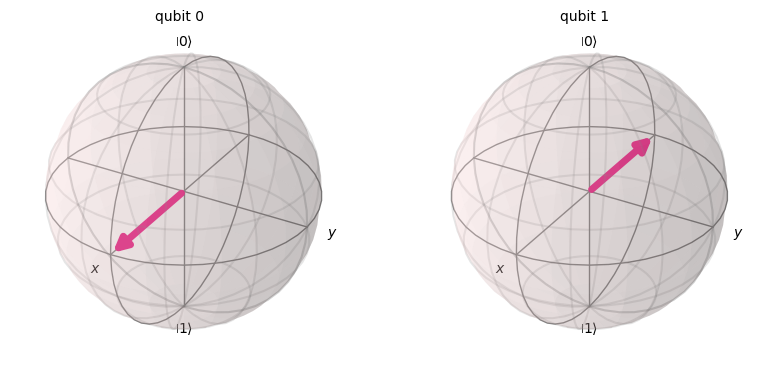

In [4]:
plot_bloch_multivector(state_vector)

<H3>Interference - an Identity example in Qiskit</H3>

In [5]:
num_qubits = 1
num_cl_bits = 1

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.h(0)

qc.measure(qr, cr)

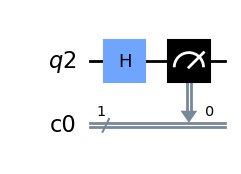

In [6]:
qc.draw("mpl")

In [7]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'1': 496, '0': 504}


In [8]:
num_qubits = 1
num_cl_bits = 1

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.h(0)

qc.measure(qr, cr)

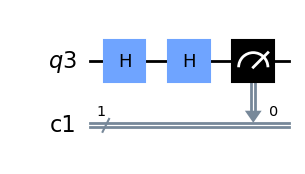

In [9]:
qc.draw("mpl")

<H3>Interference introduced by the second H gate, brings us back to the initial state of |0></H3>

First H gate: H |0> = |+>

Second H gate: H |+> = (H|0> + H|1>)/sqrt(2) = 1/sqrt(2) * 1/sqrt(2) (|0> + |1> + |0> - |1>) = 1/2 * (2*|0>) = |0>, <br>

since H|1> = 1/sqrt(2) (|0> - |1>)

<b>We see constructive and destructive interference here,</b> in |0> + |0> and |1> - |1>, respectively.


In [10]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'0': 1000}


<H3>Entanglement - a Bell State example in Qiskit</H3>

In [11]:
num_qubits = 2
num_cl_bits = 2

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_cl_bits)

qc = QuantumCircuit(qr, cr)

qc.h(0)
qc.x(1)
qc.cnot(0,1)

qc.measure(qr, cr)

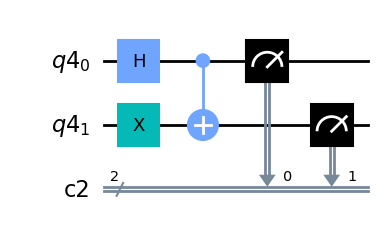

In [12]:
qc.draw("mpl")

<H3>The two qubits are entangled.  this is one of the Bell States.<H3>

In [13]:
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print(counts)

{'10': 501, '01': 499}


<H2>Q. Conclusion on the contribution of Interference, Superposition, and Entanglement on the quantum speedup in the QFT?</H2>

"We found that the concept of interference with its related notion of superposition will play
an important role in quantum computing. <b>Superposition in itself is not sufficient to cause any
excitement</b> as it has been known in the context of probabilistic computation for a long time. We
therefore suggest to drop quantum parallelism from our list of potential quantum mechanical
speedups. We will see that the technique we introduced in the section on quantum parallelism
appears again in another quantum algorithm but there we show how interference distinguishes
the algorithm from any possible classical approximation," <a href="https://pages.cs.wisc.edu/~jvangael/pubs/msthesis.pdf">Jurgen Van Gael </a> thesis.   

"The inverse quantum Fourier transform introduces interference effects
between the qubits of the first register for which the second register has the same value.
Unfortunately, <b>it is not easy to point out the source of the speedup of this quantum algorithm
because both entanglement and interference are present </b>," JVG.

<H2>Q: How do we write code to use it? </H2>  <br>
       Here we will use PennyLane to code an example using the QFT, borrowing from a
       <a ref=https://pennylane.ai/qml/demos/tutorial_qft_arithmetics/>Xanadu blog post</a> by Guillermo Alonso.  

<H3>Example: Basic Arithmetic</H3>

A use case: the oracle in Grover's algorithm

"In real-world situations, we will have to build this seemingly magical operator, the oracle, by hand. As an example, let’s imagine that we want to use Grover’s algorithm to search for magic squares. To define the oracle, which determines whether a solution is valid or not, we must perform sums over the rows and columns to check that they all have the same value. Therefore, to create this oracle, we will need to define a sum operator within the quantum computer," Guillermo Alonso.

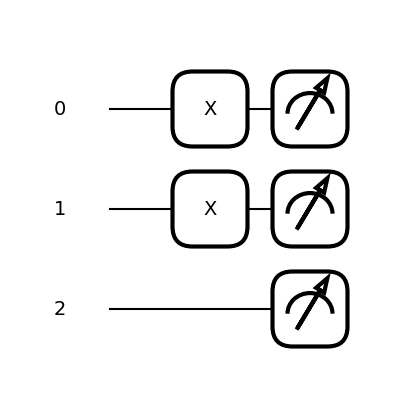

In [14]:
import pennylane as qml
import matplotlib.pyplot as plt

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
@qml.compile()
def basis_embedding_circuit(m):
    qml.BasisEmbedding(m, wires=range(3))
    return qml.state()

m = 6 # number to be encoded

qml.draw_mpl(basis_embedding_circuit, show_all_wires=True)(m)
plt.show()

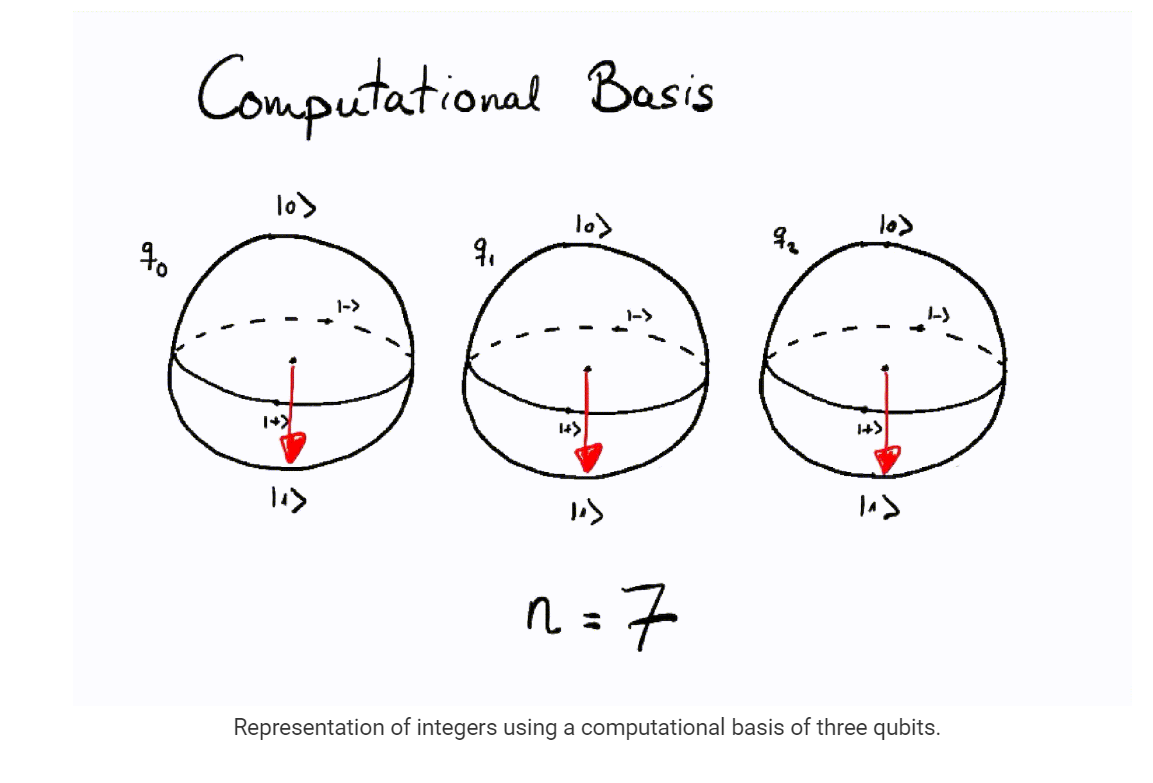

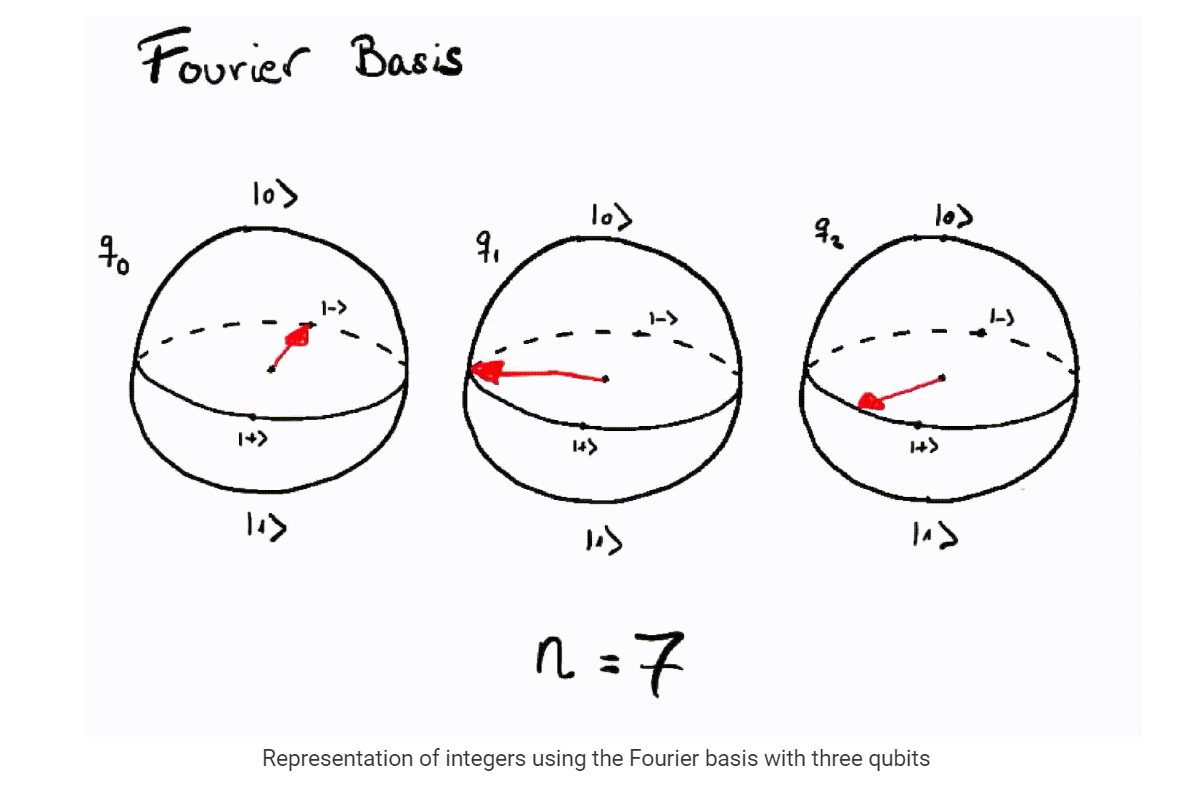

<H3>Add a number to a register</H3>

In [15]:
import pennylane as qml
from pennylane import numpy as np

n_wires = 4
dev = qml.device("default.qubit", wires=n_wires, shots=1)

def add_k_fourier(k, wires):
    for j in range(len(wires)):
        qml.RZ(k * np.pi / (2**j), wires=wires[j])

@qml.qnode(dev)
def sum(m, k):
    qml.BasisEmbedding(m, wires=range(n_wires))  # m encoding

    qml.QFT(wires=range(n_wires))  # step 1

    add_k_fourier(k, range(n_wires))  # step 2

    qml.adjoint(qml.QFT)(wires=range(n_wires))  # step 3

    return qml.sample()


print(f"The ket representation of the sum of 3 and 4 is {sum(3,4)}")

The ket representation of the sum of 3 and 4 is [0 1 1 1]


<H3>Add two different registers</H3>

The ket representation of the sum of 7 and 3 is [1 0 1 0]


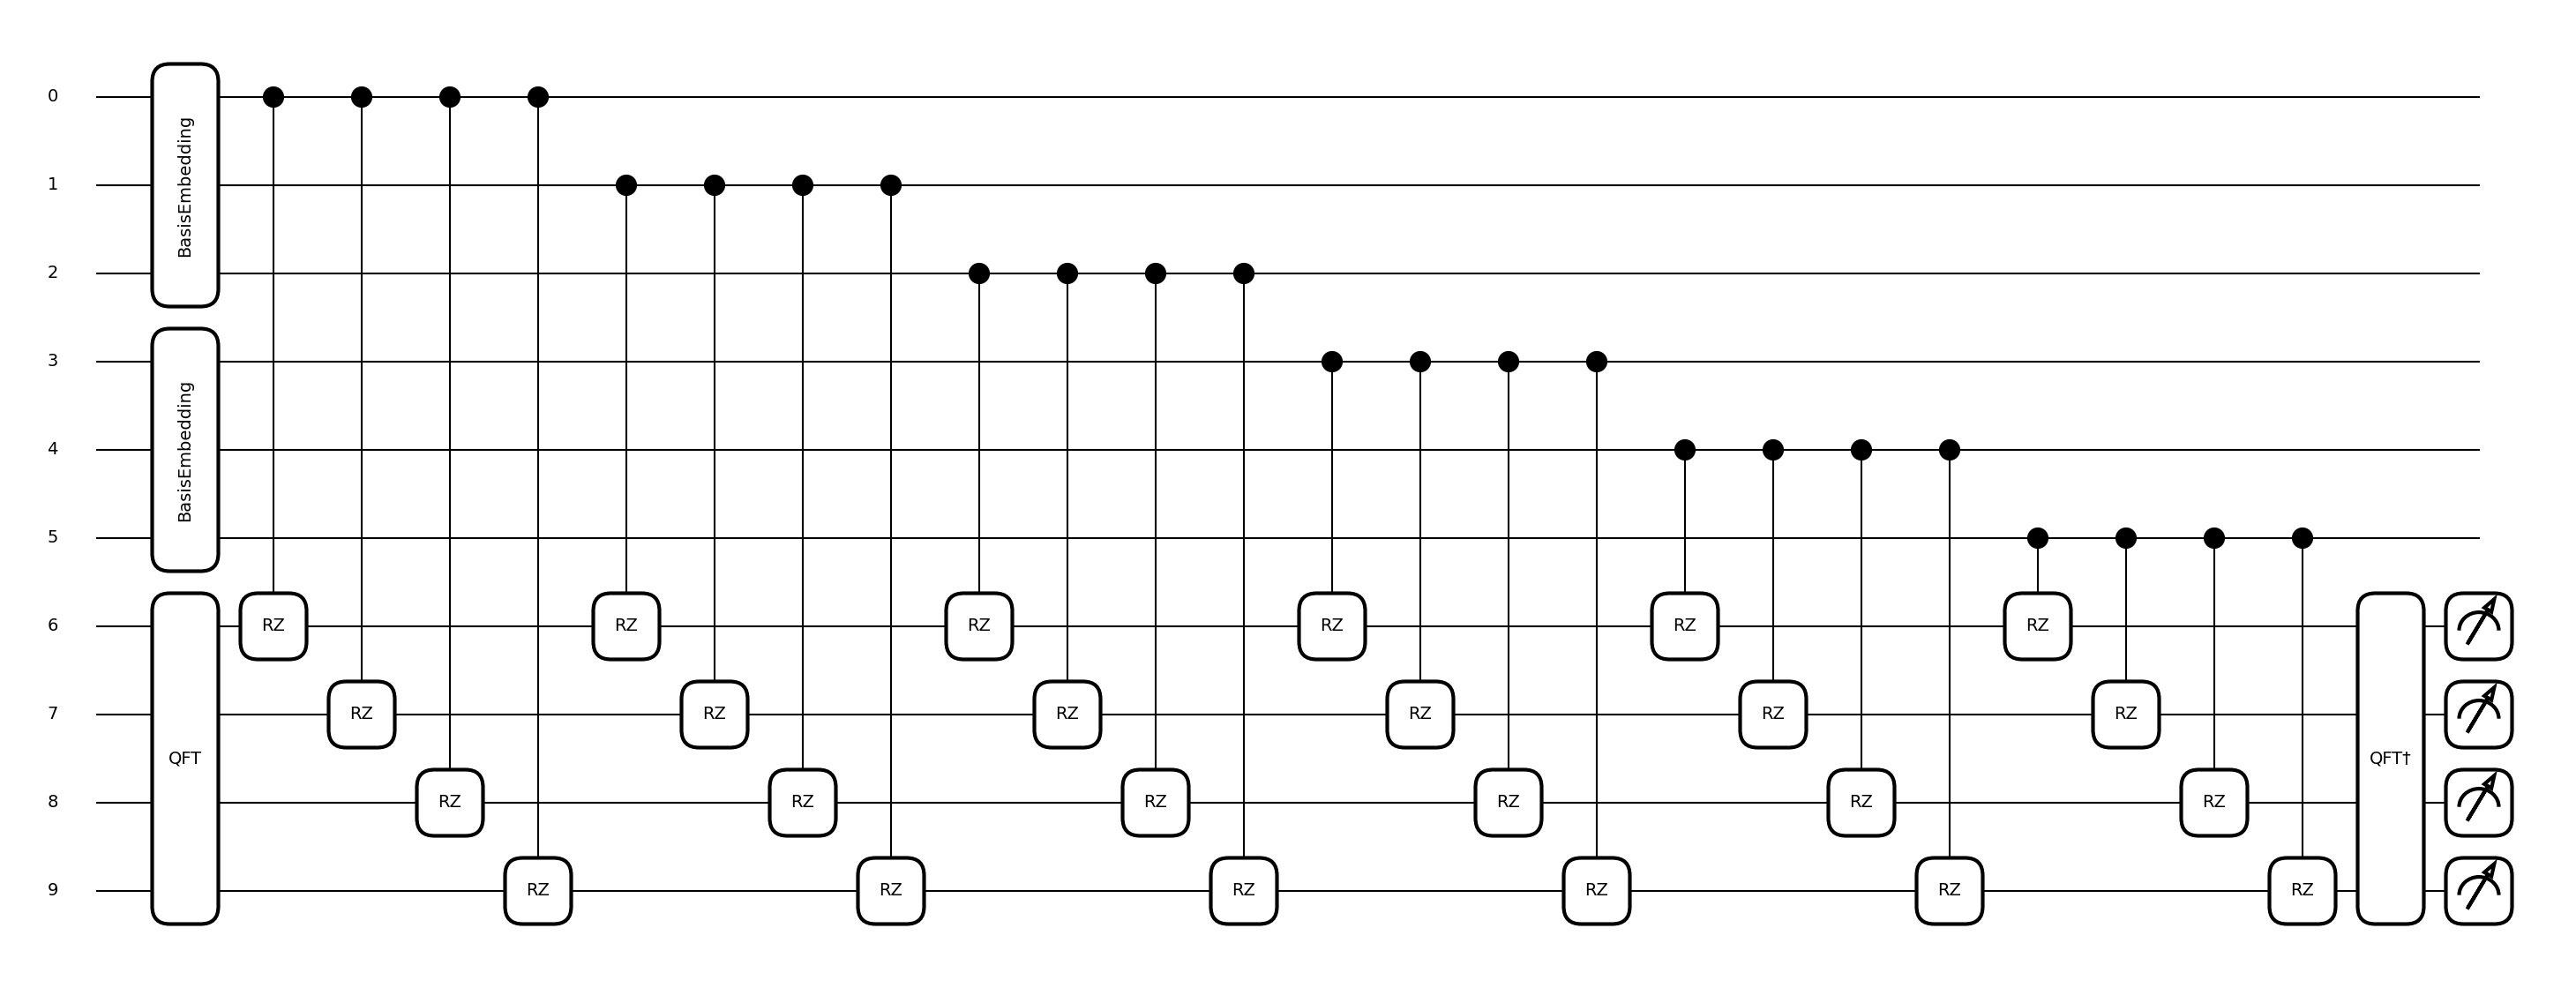

In [16]:
wires_m = [0, 1, 2]             # qubits needed to encode m
wires_k = [3, 4, 5]             # qubits needed to encode k
wires_solution = [6, 7, 8, 9]   # qubits needed to encode the solution

dev = qml.device("default.qubit", wires=wires_m + wires_k + wires_solution, shots=1)

n_wires = len(dev.wires) # total number of qubits used

def addition(wires_m, wires_k, wires_solution):
    # prepare solution qubits to counting
    qml.QFT(wires=wires_solution)

    # add m to the counter
    for i in range(len(wires_m)):
        qml.ctrl(add_k_fourier, control=wires_m[i])(2 **(len(wires_m) - i - 1), wires_solution)

    # add k to the counter
    for i in range(len(wires_k)):
        qml.ctrl(add_k_fourier, control=wires_k[i])(2 **(len(wires_k) - i - 1), wires_solution)

    # return to computational basis
    qml.adjoint(qml.QFT)(wires=wires_solution)

@qml.qnode(dev)
def sum2(m, k, wires_m, wires_k, wires_solution):
    # m and k codification
    qml.BasisEmbedding(m, wires=wires_m)
    qml.BasisEmbedding(k, wires=wires_k)

    # apply the addition circuit
    addition(wires_m, wires_k, wires_solution)

    return qml.sample(wires=wires_solution)

print(f"The ket representation of the sum of 7 and 3 is "
      f"{sum2(7, 3, wires_m, wires_k, wires_solution)}")

qml.draw_mpl(sum2, show_all_wires=True)(7, 3, wires_m, wires_k, wires_solution)
plt.show()